# Example: Quality of forecasts for linear models.

## Introduction

Example approached to assess the quality of the model's predictions [2]. The set of experimental data is shown in Table 1.

**Table 1: Experimental data. Font: [1]**

Quantity|____|____|____|____|____| 
:------:|:--:|:--:|:--:|:--:|:---:|
$x$     |1.0 |2.0 |3.0 |4.0 |5.0  |
$y$     |0.1 |0.9 |2.2 |3.2 |4.8  |

In relation to these data, it is intended to adjust a line using a procedure
least squares pattern. In this case, we have in [1]:
         
$y = α\cdot x + β $, (1)

The optimization problem to be solved uses the objective function of least squares weighted by the inverse of the variance, according to [2]:

$\min_{P_1, P_2} \sum_{i=1}^{NE} \left(\frac{y^{exp}_i-y_i(P_1, P_2)}{u^2_{y_i}}\right)$ (2)

The following symbols will be used to solve this problem in the MT_PEU:

* Symbols of the independent quantities: x
* Symbols of the dependent quantities: y
* Symbols of the parameters: $P_1, P_2$.

## Packages importing

Importing libraries (packages) needed to run the code.

* **MT_PEU_Linear**: library that contains the main functionalities of the tool

    * Import the class **EstimacaoLinear**, that will be used in this linear estimation example.

In [6]:
from sys import path 
path.append("../../modules")#A list of strings that specifies the search path for modules
from MT_PEU_Linear import EstimacaoLinear

## Class initialization

The first step to perform the estimation is to configure the class **EstimacaoLinear** through the inclusion of basic information.:

* List of symbols of the dependent quantities *(y)*; 
* List of symbols for  uncertainty *(uy)*;
* List of symbols of the independent quantities *(x)*;
* List of symbols for  uncertainty *(ux*;
* List of symbols of the parameters *(p1, p2)*;
* The project name, the folder's name where the results will be saved.

In [7]:
ER = EstimacaoLinear(['y'],['uy'],['x'],['ux'],['p1','p2'],folder='Exemple6')

## Data inclusion

The experimental data provided in Table 1 of the dependent quantity (y) and the independent quantities (x), are presented below in the form of lists:

In [8]:
#Independent quantitty
x = [0,1,2,3,4,5]

#Dependent quantity
y = [.1,.9,2.2,3.2,3.9,4.8]

The MT_PEU **needs** the **uncertainties of the experimental data** (ux, uy) to be informed. In this example, the value 1 has been assumed for all uncertainties.

In [9]:
# input 1 uncertainty
ux = [1,1,1,1,1,1]
# output 1 uncertainty
uy = [1,1,1,1,1,1]

**Entering the experimental data in MT_PEU:**

The *setDados* method is used to include the data for dependent and independent quantities. Syntax:


* The experimental data and their uncertainties must be entered  in the form of dictionary.
* glx: Degrees of freedom of quantity x;
* gly: Degrees of freedom of quantity y.

In [10]:
ER.setDados(data={'x':x,'ux':ux,'y':y ,'uy':uy},glx=[],gly=[])

UnboundLocalError: local variable 'X' referenced before assignment

## Optimization

In [6]:
ER.optimize(parametersReport=False)

## Parameters uncertainty

In this example, it is possible to choose the method used to evaluate uncertainty. 
Available: 2InvHessiana, Geral, SensibilidadeModelo. 
By definition the likelihood region filling is 'True', if necessary this option can be changed.

If the user **does not** have an interest in **evaluating the uncertainty of the parameters**, just **do not** perform **ER.parametersUncertainty**.

In [7]:
ER.parametersUncertainty(objectiveFunctionMapping=True, parametersReport=True)

## Prediction and residual analysis

The prediction method evaluates the dependent quantity based on the estimated parameters, the model informed by the user, and data of the dependent quantities. In case validation data are informed (through the setConjunto method, defining "dataType = predicao") these will be used to perform the prediction. Also, this method evaluates the covariance matrix of the prediction, in case the parametersUncertainty method has been performed.
 
Through residual analysis, it is possible to obtain indicators of estimation quality.  Aspects such as mean, homoscedasticity (which allows us to infer possible dependency and/or tendency relationships between the variables), normality, $R^2$ and autocorrelation are evaluated. The optimal point of the objective function is also evaluated. The residues analysis is performed primarily with the validation data.

**export_y:** Exports the calculated data of y, its uncertainty, and degrees of freedom in a txt with comma separation (True or False);

**export_y_xls:** Exports the calculated data of y, its uncertainty, and degrees of freedom in a xls (True or False);

**export_cov_y:** Exports the covariance matrix of y (True or False);

**export_x:** Exports the calculated data of x, its uncertainty, and degrees of freedom in a txt with comma separation(True or False);

**export_cov_x:** Exports the covariance matrix of x (True or False).

In [8]:
ER.prediction(export_y=True,export_y_xls=True, export_cov_y=True, export_x=True, export_cov_x=True)
ER.residualAnalysis(report=True)

## Plots and reports

At this stage, the results obtained by the program are exported: reports and graphs. 
The graphs are generated according to the steps that have been performed. In the reports, information about the statistical tests, objective function value, covariance matrix of the parameters, optimization status, among others, are printed.

ValueError: The number of FixedLocator locations (12), usually from a call to set_ticks, does not match the number of ticklabels (6).

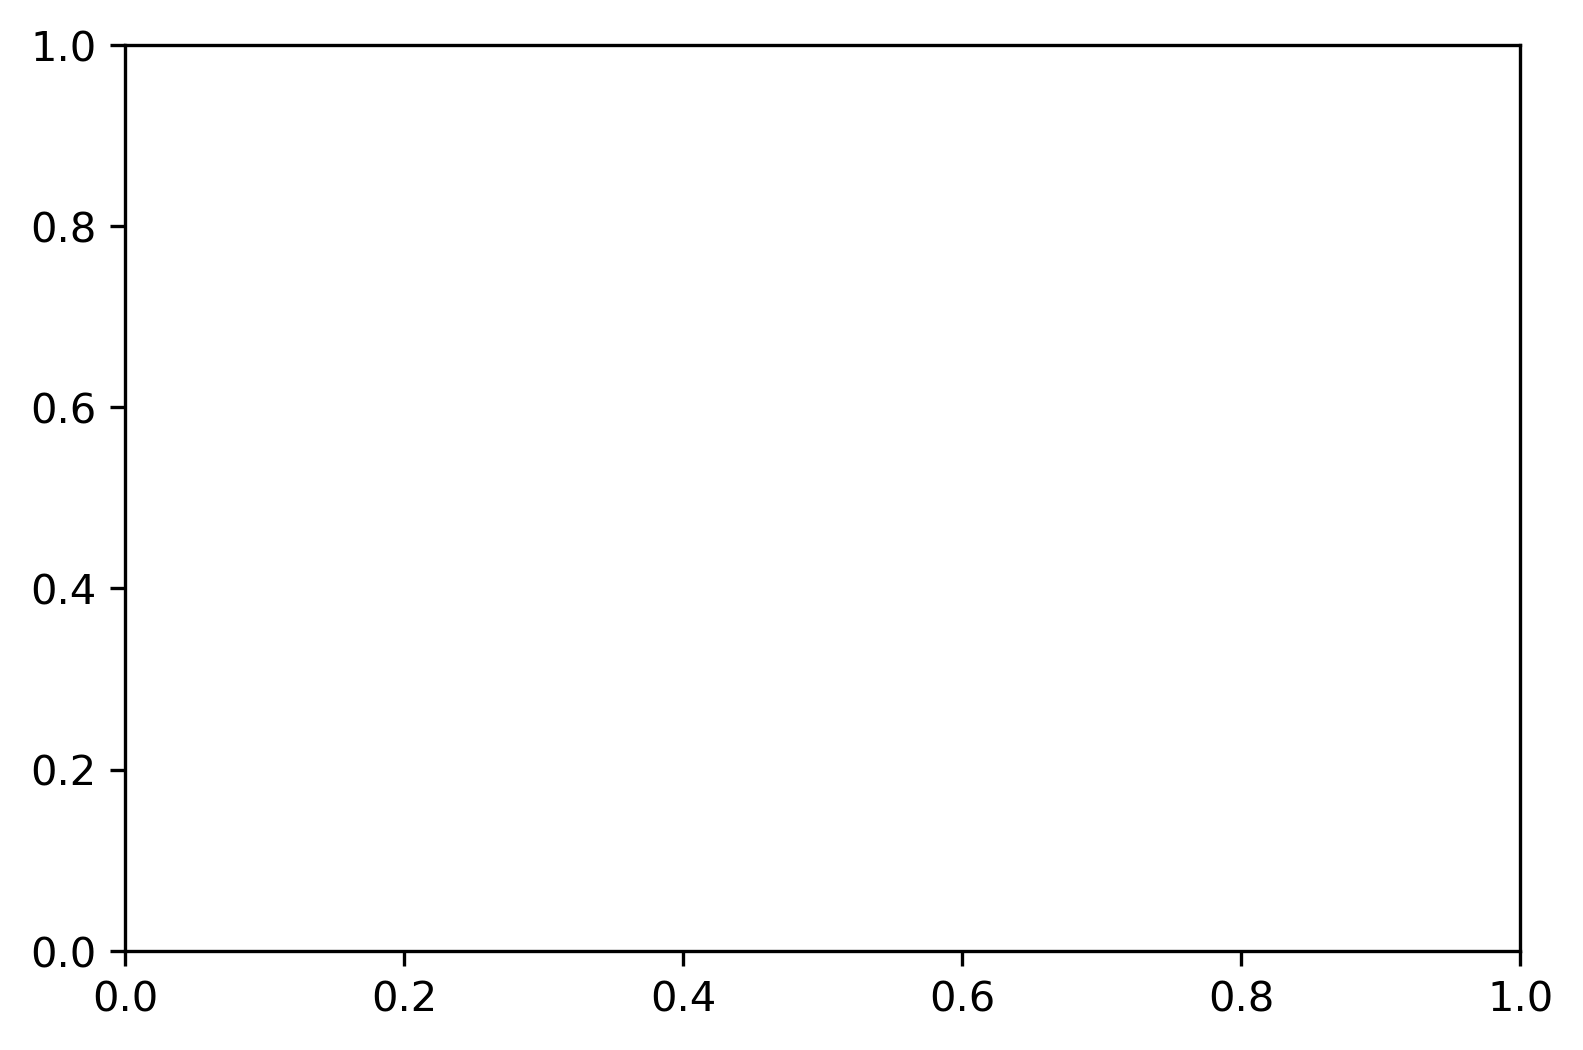

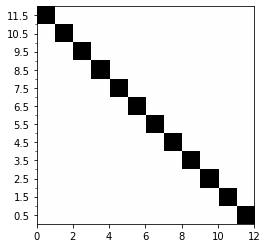

In [9]:
ER.plots()
ER.reports()

## References: 

[1] SCHWAAB, M.M.;PINTO, J.C. Análise de Dados Experimentais I: Fundamentos da Estátistica e Estimação de Parâmetros. 
Rio de Janeiro: e-papers, 2007.

[2] INMETRO.: Avaliação de dados de medição — Guia para a expressão de incerteza de medição. Rio de Janeiro: Jcgm, 2008.